In [1]:
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh
from tf_pose import common
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

w, h = model_wh('432x368')
estimator = TfPoseEstimator(get_graph_path('cmu'), target_size=(w, h))

/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

[2020-12-19 02:41:20,152] [TfPoseEstimator] [INFO] loading graph from /usr/src/app/tf_pose_estimation/models/graph/cmu/graph_opt.pb(default size=432x368)
2020-12-19 02:41:20,152 INFO loading graph from /usr/src/app/tf_pose_estimation/models/graph/cmu/graph_opt.pb(default size=432x368)


2020-12-19 02:41:20,156 WARNING From /usr/src/app/tf_pose_estimation/tf_pose/estimator.py:311: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.



2020-12-19 02:41:20,160 WARNING From /usr/src/app/tf_pose_estimation/tf_pose/estimator.py:312: The name tf.GraphDef is deprecated. Please use tf.compat.v1.GraphDef instead.



2020-12-19 02:41:20,711 WARNING From /usr/src/app/tf_pose_estimation/tf_pose/estimator.py:330: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



2020-12-19 02:41:21,606 WARNING From /usr/src/app/tf_pose_estimation/tf_pose/estimator.py:332: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



TfPoseEstimator/Openpose/concat_stage7/axis
TfPoseEstimator/Mconv7_stage6_L2/biases
TfPoseEstimator/Mconv7_stage6_L2/weights
TfPoseEstimator/Mconv6_stage6_L2/biases
TfPoseEstimator/Mconv6_stage6_L2/weights
TfPoseEstimator/Mconv5_stage6_L2/biases
TfPoseEstimator/Mconv5_stage6_L2/weights
TfPoseEstimator/Mconv4_stage6_L2/biases
TfPoseEstimator/Mconv4_stage6_L2/weights
TfPoseEstimator/Mconv3_stage6_L2/biases
TfPoseEstimator/Mconv3_stage6_L2/weights
TfPoseEstimator/Mconv2_stage6_L2/biases
TfPoseEstimator/Mconv2_stage6_L2/weights
TfPoseEstimator/Mconv1_stage6_L2/biases
TfPoseEstimator/Mconv1_stage6_L2/weights
TfPoseEstimator/Mconv7_stage6_L1/biases
TfPoseEstimator/Mconv7_stage6_L1/weights
TfPoseEstimator/Mconv6_stage6_L1/biases
TfPoseEstimator/Mconv6_stage6_L1/weights
TfPoseEstimator/Mconv5_stage6_L1/biases
TfPoseEstimator/Mconv5_stage6_L1/weights
TfPoseEstimator/Mconv4_stage6_L1/biases
TfPoseEstimator/Mconv4_stage6_L1/weights
TfPoseEstimator/Mconv3_stage6_L1/biases
TfPoseEstimator/Mconv3_st

2020-12-19 02:41:22,474 WARNING From /usr/src/app/tf_pose_estimation/tf_pose/estimator.py:341: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



2020-12-19 02:41:22,487 WARNING From /usr/src/app/tf_pose_estimation/tf_pose/estimator.py:342: The name tf.image.resize_area is deprecated. Please use tf.compat.v1.image.resize_area instead.



2020-12-19 02:41:22,617 WARNING From /usr/src/app/tf_pose_estimation/tf_pose/tensblur/smoother.py:96: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2020-12-19 02:41:22,651 WARNING From /usr/src/app/tf_pose_estimation/tf_pose/estimator.py:354: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


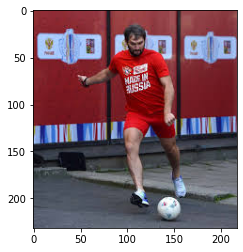

In [2]:
image_name = 'p1.jpg'
path_image = f'./images/{image_name}'
path_image_out = os.path.join('./estimated_images/')

image = common.read_imgfile(path_image, None, None)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

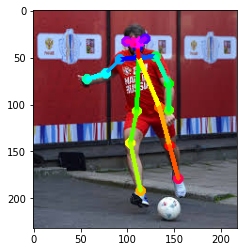

In [3]:
humans = estimator.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)
estimated_image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)

fig = plt.figure()
plt.imshow(cv2.cvtColor(estimated_image, cv2.COLOR_BGR2RGB))

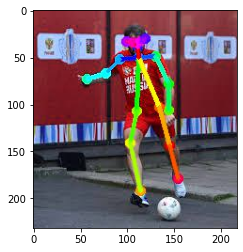

In [4]:
os.makedirs(path_image_out, exist_ok=True)
saved_path = os.path.join(path_image_out, image_name)
plt.imsave(saved_path, estimated_image)
saved_image = common.read_imgfile(saved_path, None, None)
plt.imshow(saved_image)